In [2]:
import scanpy as sc

In [3]:
adata=sc.read_h5ad("pbmc_pca.h5ad")

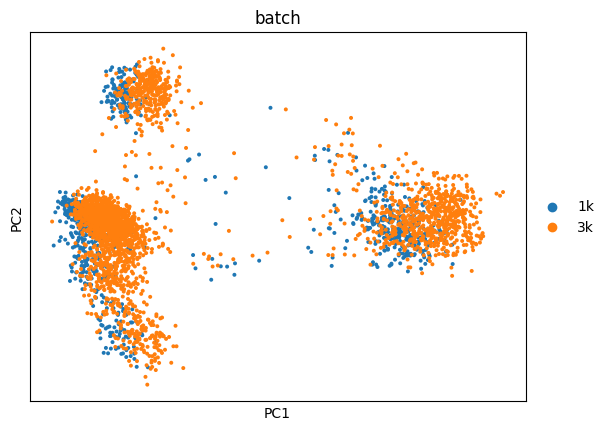

In [4]:
sc.pl.pca(adata,color='batch')

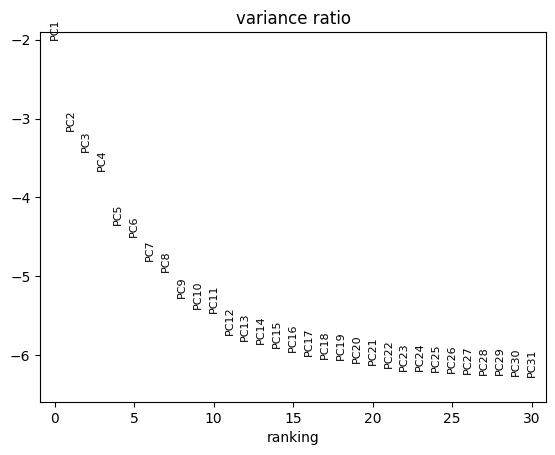

In [5]:
sc.pl.pca_variance_ratio(adata, log=True)

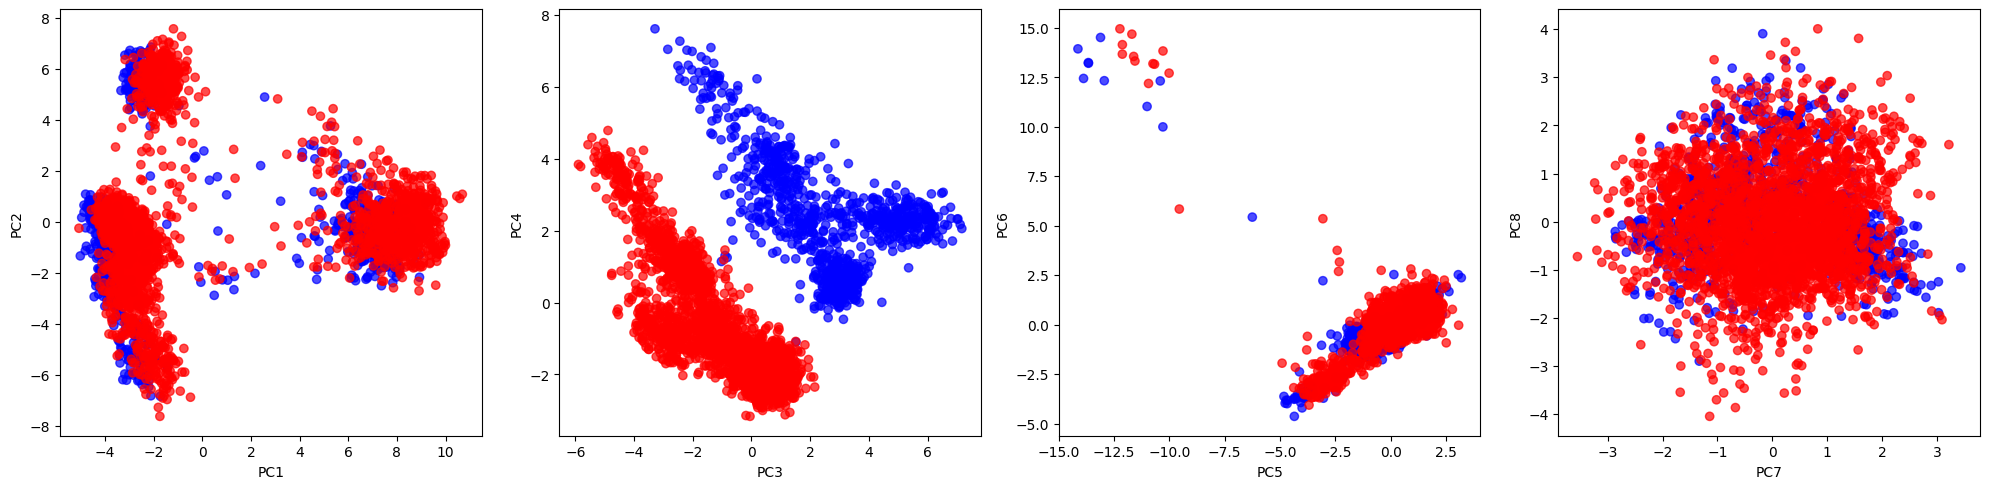

In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Create a figure with 4 subplots
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(20, 5))

# Randomly shuffle the data
shuffled_data = pd.DataFrame(adata.obsm['X_pca'],columns=['PC'+str(i) for i in range(1,51)])
shuffled_data['donor'] = adata.obs.loc[:,'batch'].tolist()

# Define common plot settings
def create_pc_plot(ax, data, pc1, pc2):
    scatter = ax.scatter(
        data[pc1], 
        data[pc2],
        c=data['donor'].map({'1k': 'blue', '3k': 'red'}),
        # s=[{'VDJ24110600020': 90, 'donor2': 30, 'donor3': 50}[d] for d in data['donor']],
        alpha=0.7
    )
    ax.set_xlabel(pc1)
    ax.set_ylabel(pc2)

# Create the four PC plots
create_pc_plot(ax1, shuffled_data, 'PC1', 'PC2')
create_pc_plot(ax2, shuffled_data, 'PC3', 'PC4')
create_pc_plot(ax3, shuffled_data, 'PC5', 'PC6')
create_pc_plot(ax4, shuffled_data, 'PC7', 'PC8')

# Set the title
# title = f"PCA with {format(log10cpm[cpm_info['ods']].shape[0], ',')} genes and {format(dat_pca.shape[0], ',')} cells from 3 PBMC batchs, published by 10x Genomics"
# fig.suptitle(title)

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
#   max_iter_harmony=20,  # 增加最大迭代次数
#   lambda_=0.5,         # 减小整合力度
#   theta=1.5,           # 调整多样性聚类惩罚参数
#   sigma=0.2,           # 调整软 k 均值聚类的宽度
#   nclust=30            # 调整聚类数量
sc.external.pp.harmony_integrate(adata, 'batch')#, nclust=15)


2025-06-02 11:17:34,817 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-06-02 11:17:35,224 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-06-02 11:17:35,233 - harmonypy - INFO - Iteration 1 of 10
2025-06-02 11:17:35,528 - harmonypy - INFO - Iteration 2 of 10
2025-06-02 11:17:35,823 - harmonypy - INFO - Iteration 3 of 10
2025-06-02 11:17:36,058 - harmonypy - INFO - Iteration 4 of 10
2025-06-02 11:17:36,177 - harmonypy - INFO - Iteration 5 of 10
2025-06-02 11:17:36,278 - harmonypy - INFO - Iteration 6 of 10
2025-06-02 11:17:36,368 - harmonypy - INFO - Iteration 7 of 10
2025-06-02 11:17:36,511 - harmonypy - INFO - Iteration 8 of 10
2025-06-02 11:17:36,599 - harmonypy - INFO - Iteration 9 of 10
2025-06-02 11:17:36,690 - harmonypy - INFO - Iteration 10 of 10
2025-06-02 11:17:36,780 - harmonypy - INFO - Stopped before convergence


/Users/secretloong/.pyenv/versions/anaconda3-2024.10-1/envs/singlecell/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


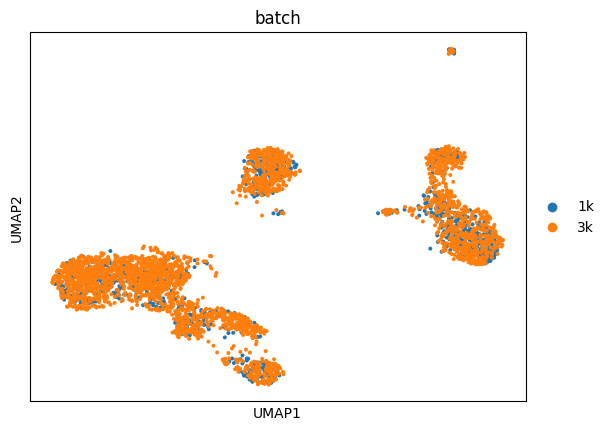

In [8]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30, use_rep='X_pca_harmony')
sc.tl.umap(adata)
sc.pl.umap(adata,color='batch')

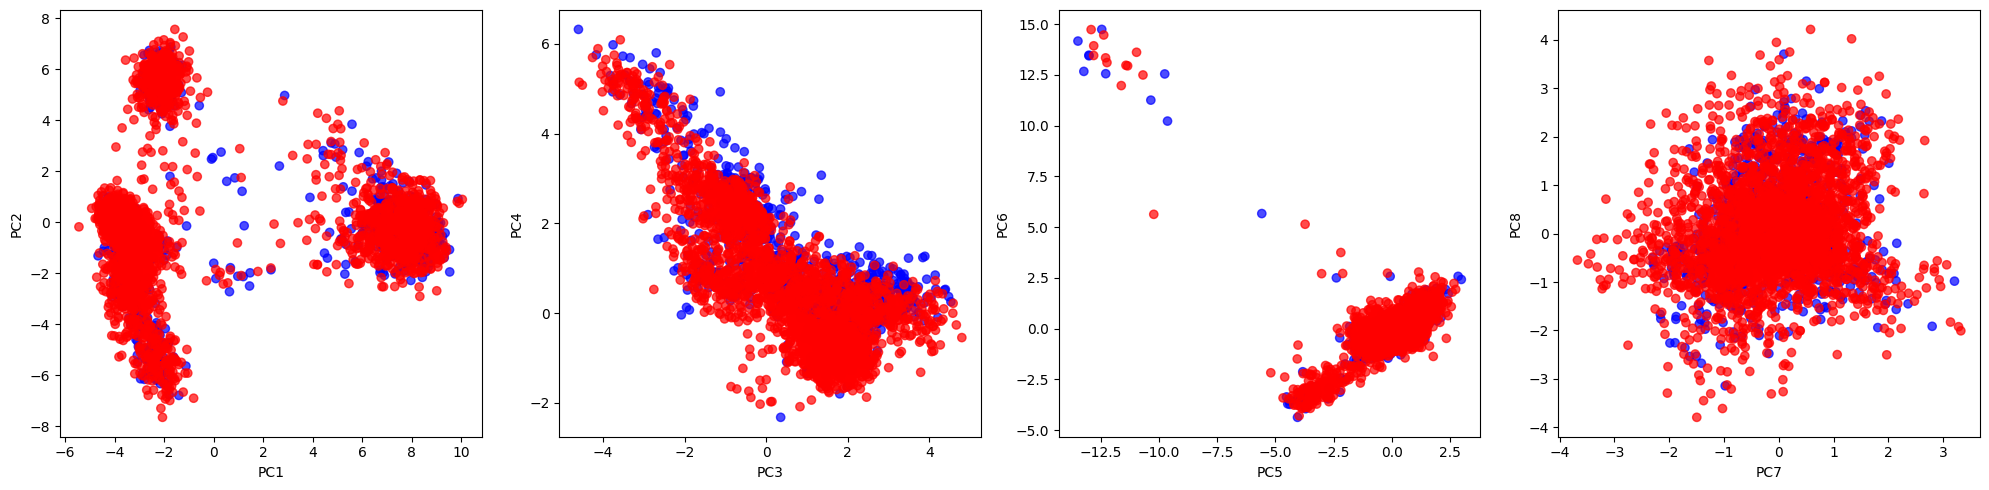

In [9]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Create a figure with 4 subplots
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(20, 5))

# Randomly shuffle the data
shuffled_data = pd.DataFrame(adata.obsm['X_pca_harmony'],columns=['PC'+str(i) for i in range(1,51)])
shuffled_data['donor'] = adata.obs.loc[:,'batch'].tolist()


# Define common plot settings
def create_pc_plot(ax, data, pc1, pc2):
    scatter = ax.scatter(
        data[pc1], 
        data[pc2],
        c=data['donor'].map({'1k': 'blue', '3k': 'red'}),
        # s=[{'VDJ24110600020': 90, 'donor2': 30, 'donor3': 50}[d] for d in data['donor']],
        alpha=0.7
    )
    ax.set_xlabel(pc1)
    ax.set_ylabel(pc2)

# Create the four PC plots
create_pc_plot(ax1, shuffled_data, 'PC1', 'PC2')
create_pc_plot(ax2, shuffled_data, 'PC3', 'PC4')
create_pc_plot(ax3, shuffled_data, 'PC5', 'PC6')
create_pc_plot(ax4, shuffled_data, 'PC7', 'PC8')

# Set the title
# title = f"PCA with {format(log10cpm[cpm_info['ods']].shape[0], ',')} genes and {format(dat_pca.shape[0], ',')} cells from 3 PBMC batchs, published by 10x Genomics"
# fig.suptitle(title)

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
adata.write_h5ad('pbmc_harmony.h5ad',compression='gzip')